In [93]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


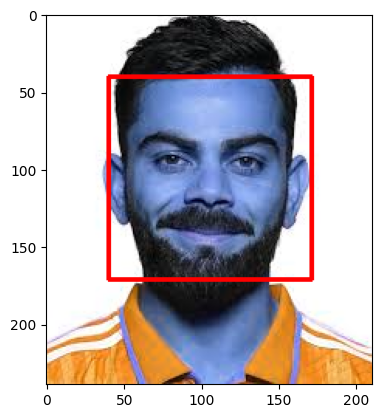

In [94]:
img = cv2.imread("test/India Men's Cricket Team - Virat Kohli ....jpg")
img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
(x,y,w,h) = faces[0]
x,y,w,h
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)


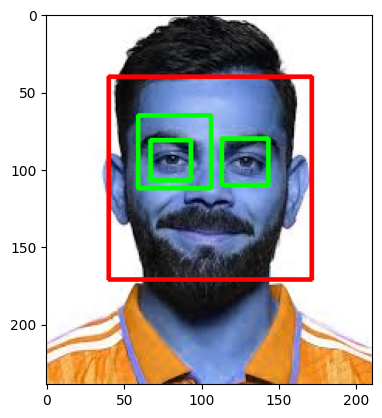

(131, 131, 3)

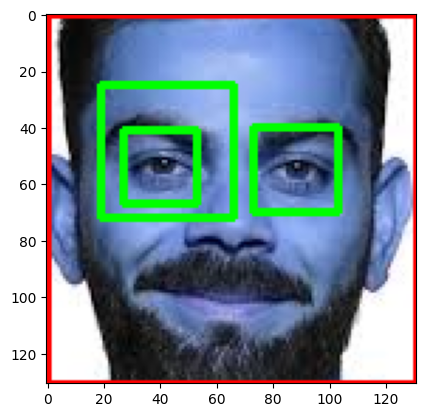

In [95]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
cropped_img = np.array(roi_color)
cropped_img.shape


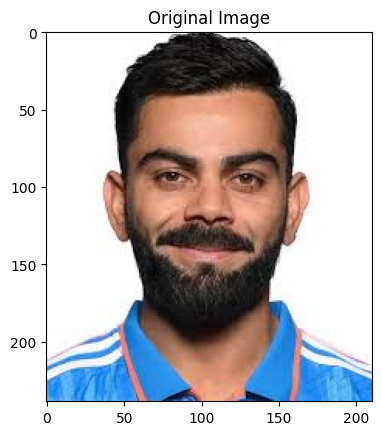

Detected 1 faces
Detected 3 eyes


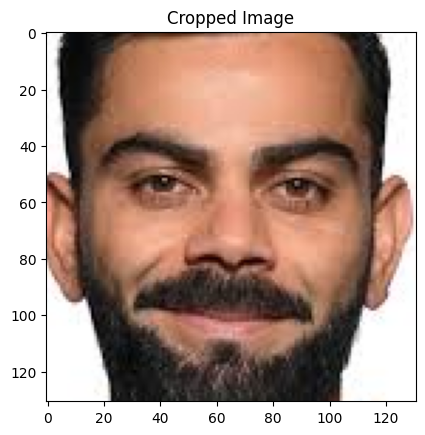

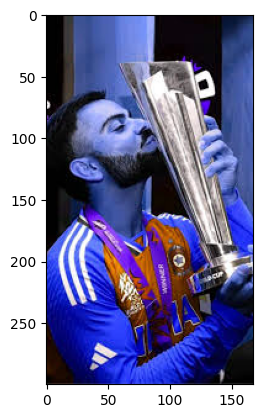

In [96]:
import cv2
import matplotlib.pyplot as plt

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    print(f"Detected {len(faces)} faces")

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        print(f"Detected {len(eyes)} eyes")
        
        if len(eyes) >= 2:
            return roi_color
    
    print("No valid face with two eyes found.")
    return None


# Read original image
original_image = cv2.imread("test/India Men's Cricket Team - Virat Kohli ....jpg")

if original_image is not None:
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.show()
else:
    print("Error: Could not load original image.")

# Get cropped image
cropped_image = get_cropped_image_if_2_eyes("test/India Men's Cricket Team - Virat Kohli ....jpg")

# Show cropped image only if it is not None
if cropped_image is not None:
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Image")
    plt.show()
else:
    print("No cropped image available.")


org_image_obstructed = cv2.imread('test/Virat Kohli Career _ Cricket News ....jpg')
plt.imshow(org_image_obstructed)


In [97]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

print(img_dirs)        

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1



['./dataset/andrew garfield', './dataset/cropped', './dataset/jasprit bumrah - Google Search', './dataset/lionel messi', './dataset/maria sharapova', './dataset/selena gomez', './dataset/virat kohli - Google Search']
andrew garfield
Detected 1 faces
Detected 2 eyes
Generating cropped images in folder:  ./dataset/cropped/andrew garfield
Detected 1 faces
Detected 1 eyes
No valid face with two eyes found.
Detected 1 faces
Detected 2 eyes
Detected 1 faces
Detected 2 eyes
Detected 1 faces
Detected 1 eyes
No valid face with two eyes found.
Detected 1 faces
Detected 1 eyes
No valid face with two eyes found.
Detected 1 faces
Detected 1 eyes
No valid face with two eyes found.
Detected 0 faces
No valid face with two eyes found.
Detected 1 faces
Detected 1 eyes
No valid face with two eyes found.
Detected 1 faces
Detected 2 eyes
Detected 1 faces
Detected 2 eyes
Detected 1 faces
Detected 2 eyes
Detected 1 faces
Detected 2 eyes
Error: Could not read image at ./dataset/andrew garfield\art” – Andrew G

In [98]:
celebrity_file_names_dict = {}
print(cropped_image_dirs)
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict            

['./dataset/cropped/andrew garfield', './dataset/cropped/lionel messi', './dataset/cropped/maria sharapova', './dataset/cropped/selena gomez', './dataset/cropped/virat kohli - Google Search']


{'andrew garfield': ['./dataset/cropped/andrew garfield\\andrew garfield1.png',
  './dataset/cropped/andrew garfield\\andrew garfield10.png',
  './dataset/cropped/andrew garfield\\andrew garfield11.png',
  './dataset/cropped/andrew garfield\\andrew garfield2.png',
  './dataset/cropped/andrew garfield\\andrew garfield3.png',
  './dataset/cropped/andrew garfield\\andrew garfield4.png',
  './dataset/cropped/andrew garfield\\andrew garfield5.png',
  './dataset/cropped/andrew garfield\\andrew garfield6.png',
  './dataset/cropped/andrew garfield\\andrew garfield7.png',
  './dataset/cropped/andrew garfield\\andrew garfield8.png',
  './dataset/cropped/andrew garfield\\andrew garfield9.png'],
 'lionel messi': ['./dataset/cropped/lionel messi\\lionel messi1.png',
  './dataset/cropped/lionel messi\\lionel messi10.png',
  './dataset/cropped/lionel messi\\lionel messi11.png',
  './dataset/cropped/lionel messi\\lionel messi12.png',
  './dataset/cropped/lionel messi\\lionel messi2.png',
  './dataset/

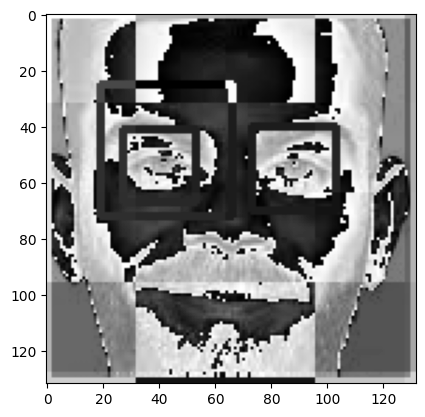

In [99]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')


In [100]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   
len(X[0])  
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape        


(48, 4096)

In [101]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.5833333333333334

In [102]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_estimators['svm'].score(X_test,y_test)
best_clf = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


C:\Users\itssh\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\itssh\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\itssh\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\itssh\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\itssh\AppData\Roaming\Python\Python311\site-p

array([[3, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 3],
       [0, 0, 0, 3]], dtype=int64)

In [103]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))